# Part I: Recurrent neural network (60%) 
1, Use a sequential data set (can be text data set or other types).

#  Business question
Given the daily power requirement of a household for the past 30 days, what is the expected household power usage for the next day?

Data Background:

The Household Power Consumption dataset is a multivariate time series dataset that describes the electricity consumption (with a one-minute sampling rate) for a single household over four years

The data contains 2,075,259 observations and 8 features (including timestamp) collected from a house in France between December 2006 and November 2010

This notebook is only for visualizations.

In [2]:
%run loading_cleaning_datagen.ipynb

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python3.8 -m pip install --upgrade pip
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1824894 entries, 2006-12-16 17:24:00 to 2010-06-06 00:17:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   global_active_power    object 
 1   global_reactive_power  object 
 2   voltage                object 
 3   global_intensity       object 
 4   sub_metering_1         object 
 5   sub_metering_2         object 
 6   sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 111.4+ MB


KeyboardInterrupt: 

ValueError: Date ordinal 15778080.0 converts to 45168-12-01T00:00:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1440x360 with 1 Axes>

KeyboardInterrupt: 

In [280]:
# plot_model(history)
model_rnn =  tf.keras.models.load_model('rnn_power_checkpoint.h5')
model_lstm_tanh =  tf.keras.models.load_model('lstm_power_checkpoint.h5')
model_lstm_relu =  tf.keras.models.load_model('lstm_relu_power_checkpoint.h5')
model_rnn_lstm =  tf.keras.models.load_model('rnn_lstm_tanh_power_checkpoint.h5')

In [281]:
# Loss and mae value for the model in test mode
score = model_rnn.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {score[0]:.4f}') 
print(f'Test mae: {score[1]:.4f}')

Test loss: 0.0076
Test mae: 0.0646


In [282]:
# Loss and mae value for the model in test mode
score = model_lstm_tanh.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {score[0]:.4f}') 
print(f'Test mae: {score[1]:.4f}')

Test loss: 0.0073
Test mae: 0.0631


In [283]:
# Loss and mae value for the model in test mode
score = model_lstm_relu.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {score[0]:.4f}') 
print(f'Test mae: {score[1]:.4f}')

Test loss: 0.0072
Test mae: 0.0645


In [284]:
# Loss and mae value for the model in test mode
score = model_rnn_lstm.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {score[0]:.4f}') 
print(f'Test mae: {score[1]:.4f}')

Test loss: 0.0074
Test mae: 0.0642


In [266]:
test_l = 100
train_l = 200

In [267]:
# Inverse scaling of X_test, y_test
X_test_inv = inv_scale(univar_data, X_test, TRAIN_SPLIT)[-test_l:]
y_test_inv = inv_scale(univar_data, y_test, TRAIN_SPLIT)[-test_l:]
X_train_inv = inv_scale(univar_data, X_train, TRAIN_SPLIT)[-train_l:]
y_train_inv = inv_scale(univar_data, y_train, TRAIN_SPLIT)[-train_l:]

In [244]:
y_pred_train_rnn = model_rnn.predict(X_train)
y_pred_test_rnn = model_rnn.predict(X_test)

In [245]:
y_pred_train_lstm_tanh = model_lstm_tanh.predict(X_train)
y_pred_test_lstm_tanh = model_lstm_tanh.predict(X_test)

In [246]:
y_pred_train_lstm_relu = model_lstm_relu.predict(X_train)
y_pred_test_lstm_relu = model_lstm_relu.predict(X_test)

In [247]:
y_pred_train_rnn_lstm = model_rnn_lstm.predict(X_train)
y_pred_test_rnn_lstm = model_rnn_lstm.predict(X_test)

In [268]:
y_pred_train_rnn_inv = inv_scale(univar_data, y_pred_train_rnn, TRAIN_SPLIT)[-train_l:]
y_pred_test_rnn_inv = inv_scale(univar_data, y_pred_test_rnn, TRAIN_SPLIT)[-test_l:]

In [269]:
y_pred_train_lstm_tanh_inv = inv_scale(univar_data, y_pred_train_lstm_tanh, TRAIN_SPLIT)[-train_l:]
y_pred_test_lstm_tanh_inv = inv_scale(univar_data, y_pred_test_lstm_tanh, TRAIN_SPLIT)[-test_l:]

In [270]:
y_pred_train_lstm_relu_inv = inv_scale(univar_data, y_pred_train_lstm_relu, TRAIN_SPLIT)[-train_l:]
y_pred_test_lstm_relu_inv = inv_scale(univar_data, y_pred_test_lstm_relu, TRAIN_SPLIT)[-test_l:]

In [271]:
y_pred_train_rnn_lstm_inv = inv_scale(univar_data, y_pred_train_rnn_lstm, TRAIN_SPLIT)[-train_l:]
y_pred_test_rnn_lstm_inv = inv_scale(univar_data, y_pred_test_rnn_lstm, TRAIN_SPLIT)[-test_l:][-train_l:]

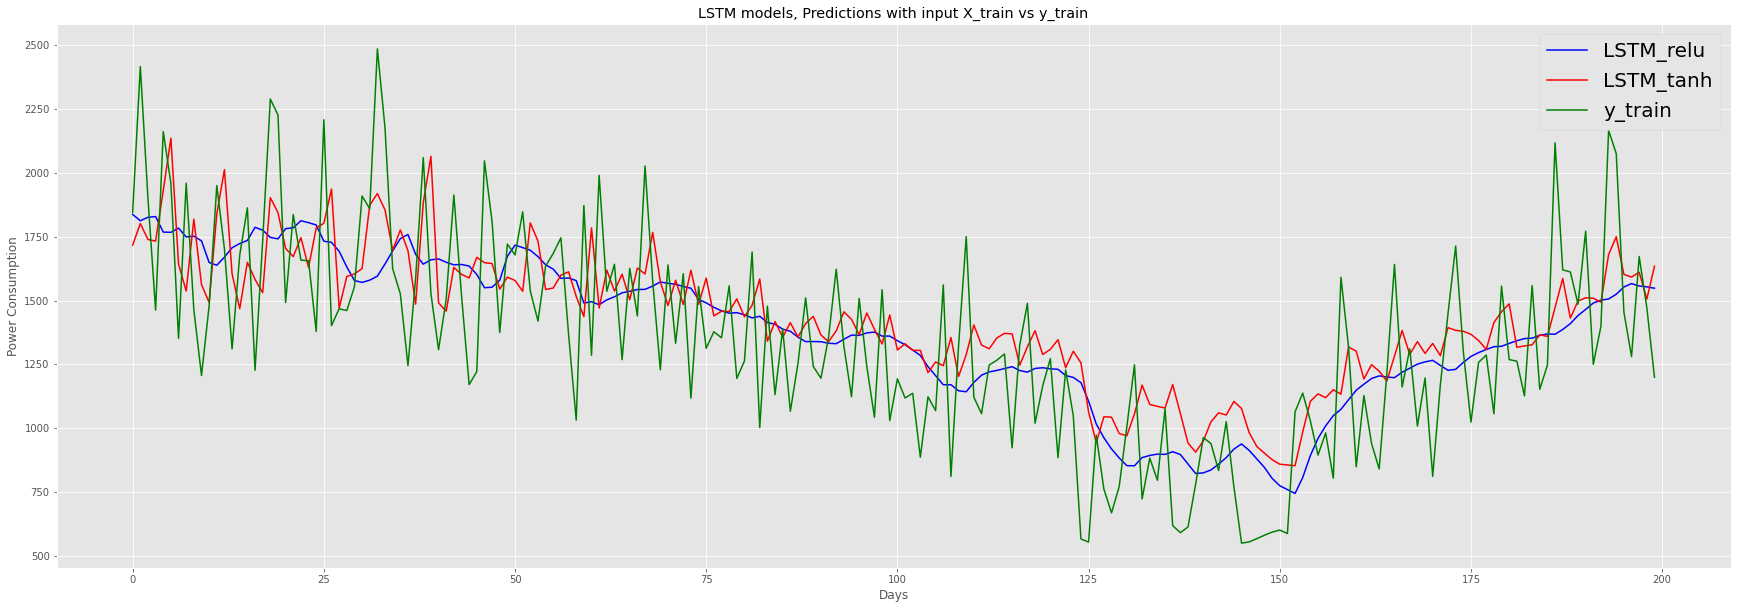

In [292]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_train_lstm_relu_inv.reshape(-1,1), color = "b", label = "LSTM_relu", )
plt.plot(y_pred_train_lstm_tanh_inv.reshape(-1,1), color = "r", label = "LSTM_tanh", )
# plt.plot(y_pred_train_rnn_lstm_inv.reshape(-1,1), color = "b", label = "rnn_lstm", )
# plt.plot(y_pred_train_rnn_inv.reshape(-1,1), color = "r", label = "rnn", )

plt.plot(y_train_inv.reshape(-1,1), color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Power Consumption")
plt.title("LSTM models, Predictions with input X_train vs y_train")
plt.legend(prop={'size': 20})
plt.show()

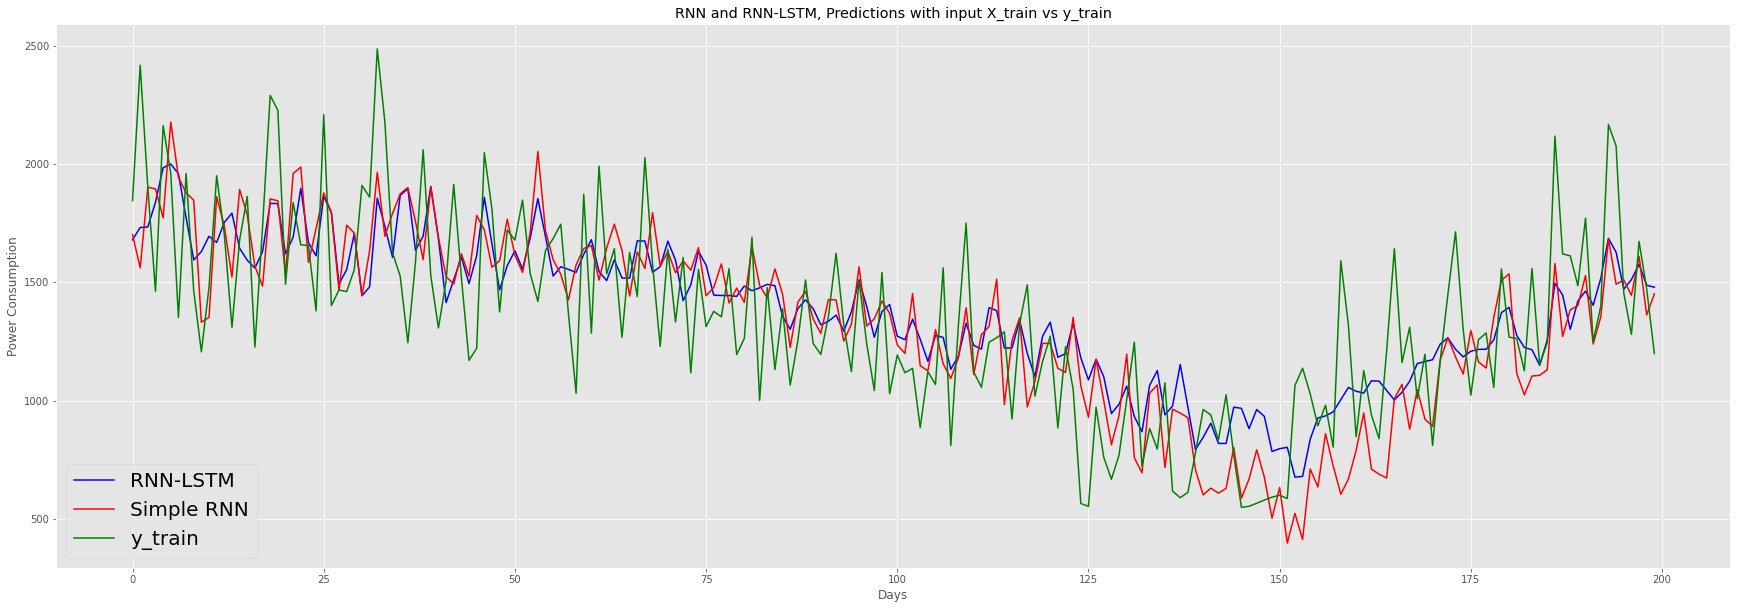

In [291]:
# visualisation
plt.figure(figsize = (30,10))
# plt.plot(y_pred_train_lstm_relu_inv.reshape(-1,1), color = "b", label = "lstm_relu", )
# plt.plot(y_pred_train_lstm_tanh_inv.reshape(-1,1), color = "r", label = "lstm_tanh", )
plt.plot(y_pred_train_rnn_lstm_inv.reshape(-1,1), color = "b", label = "RNN-LSTM", )
plt.plot(y_pred_train_rnn_inv.reshape(-1,1), color = "r", label = "Simple RNN", )

plt.plot(y_train_inv.reshape(-1,1), color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Power Consumption")
plt.title("RNN and RNN-LSTM, Predictions with input X_train vs y_train")
plt.legend(prop={'size': 20})
plt.show()

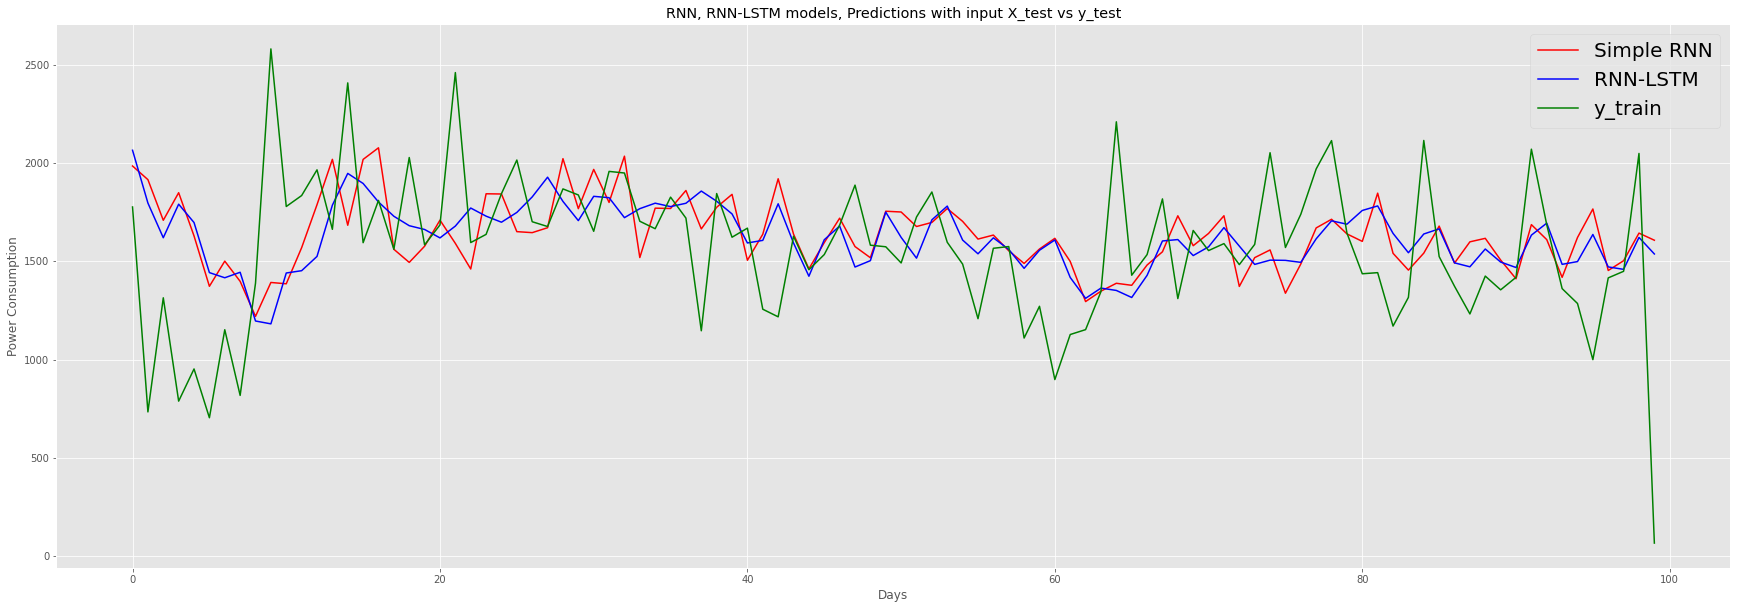

In [294]:
# visualisation
plt.figure(figsize = (30,10))
# plt.plot(y_pred_train_lstm_relu_inv.reshape(-1,1), color = "b", label = "lstm_relu", )
plt.plot(y_pred_test_rnn_inv.reshape(-1,1), color = "r", label = "Simple RNN", )
plt.plot(y_pred_test_rnn_lstm_inv.reshape(-1,1), color = "b", label = "RNN-LSTM", )
# plt.plot(y_pred_train_rnn_inv.reshape(-1,1), color = "r", label = "rnn", )

plt.plot(y_test_inv.reshape(-1,1), color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Power Consumption")
plt.title("RNN, RNN-LSTM models, Predictions with input X_test vs y_test")
plt.legend(prop={'size': 20})
plt.show()

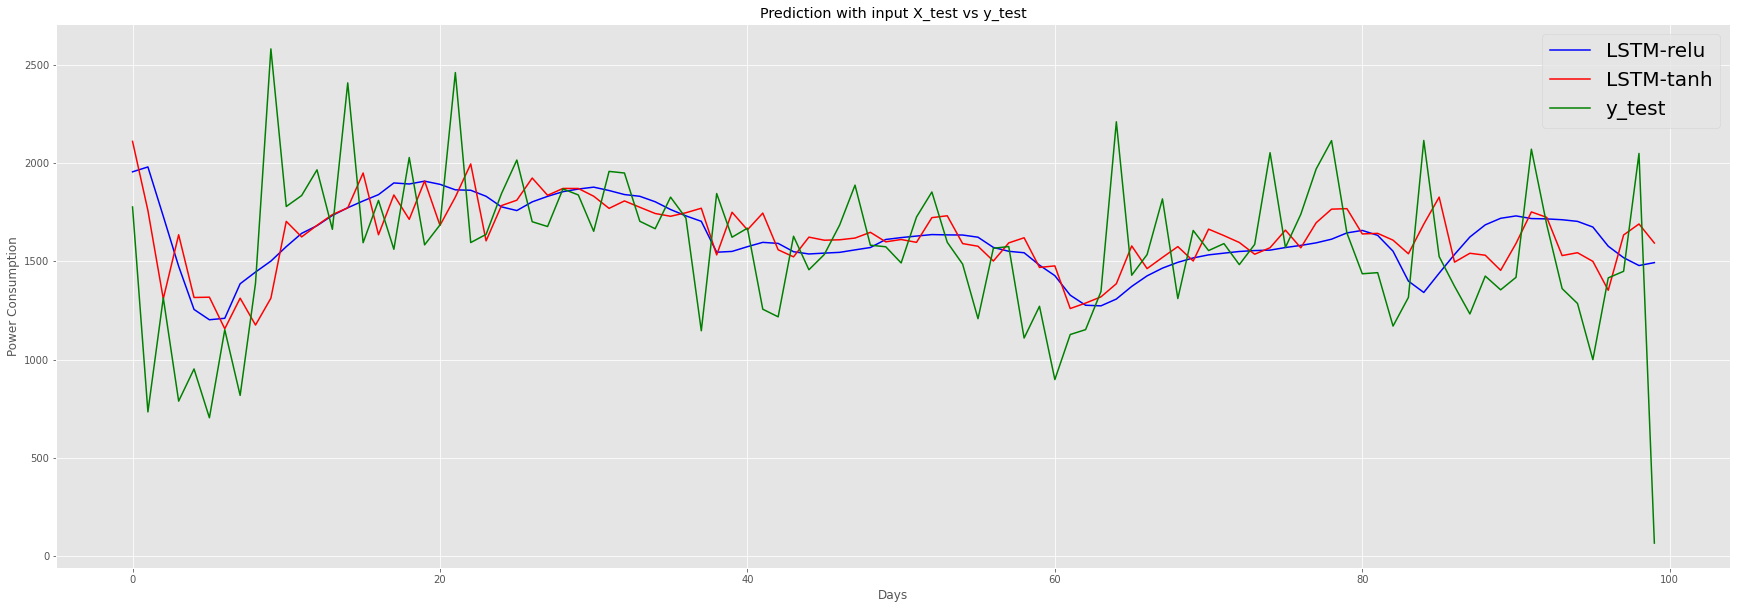

In [295]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_test_lstm_relu_inv.reshape(-1,1), label = "LSTM-relu", c = "b")
plt.plot(y_pred_test_lstm_tanh_inv.reshape(-1,1), label = "LSTM-tanh", c = "r")

plt.plot(y_test_inv.reshape(-1,1), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Power Consumption")
plt.title("Prediction with input X_test vs y_test")
plt.legend(prop={'size': 20})
plt.show()

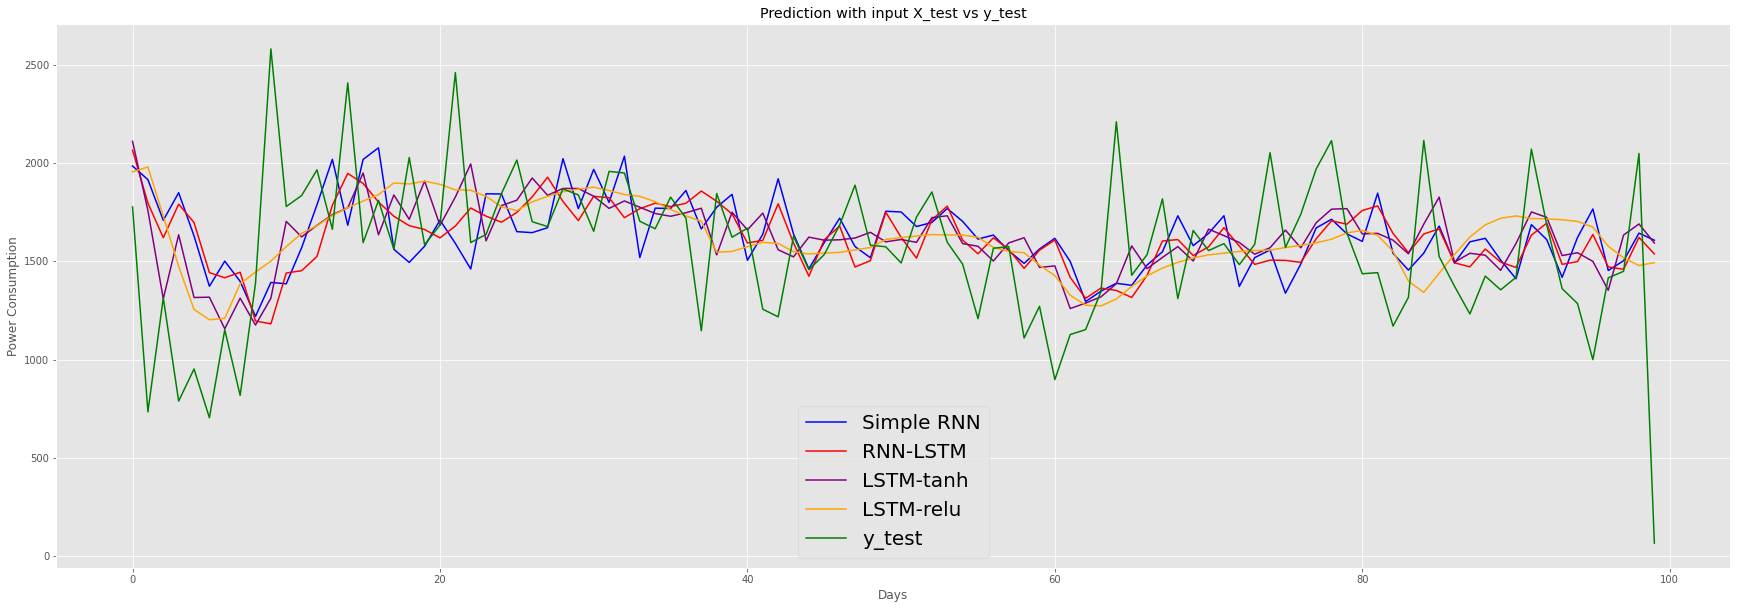

In [309]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_test_rnn_inv.reshape(-1,1), label = "Simple RNN", c = "b")
plt.plot(y_pred_test_rnn_lstm_inv.reshape(-1,1), label = "RNN-LSTM", c = "r")
plt.plot(y_pred_test_lstm_tanh_inv.reshape(-1,1), label = "LSTM-tanh", c = "purple")
plt.plot(y_pred_test_lstm_relu_inv.reshape(-1,1), label = "LSTM-relu", c = "orange")

plt.plot(y_test_inv.reshape(-1,1), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Power Consumption")
plt.title("Prediction with input X_test vs y_test")
plt.legend(prop={'size': 20})
plt.show()

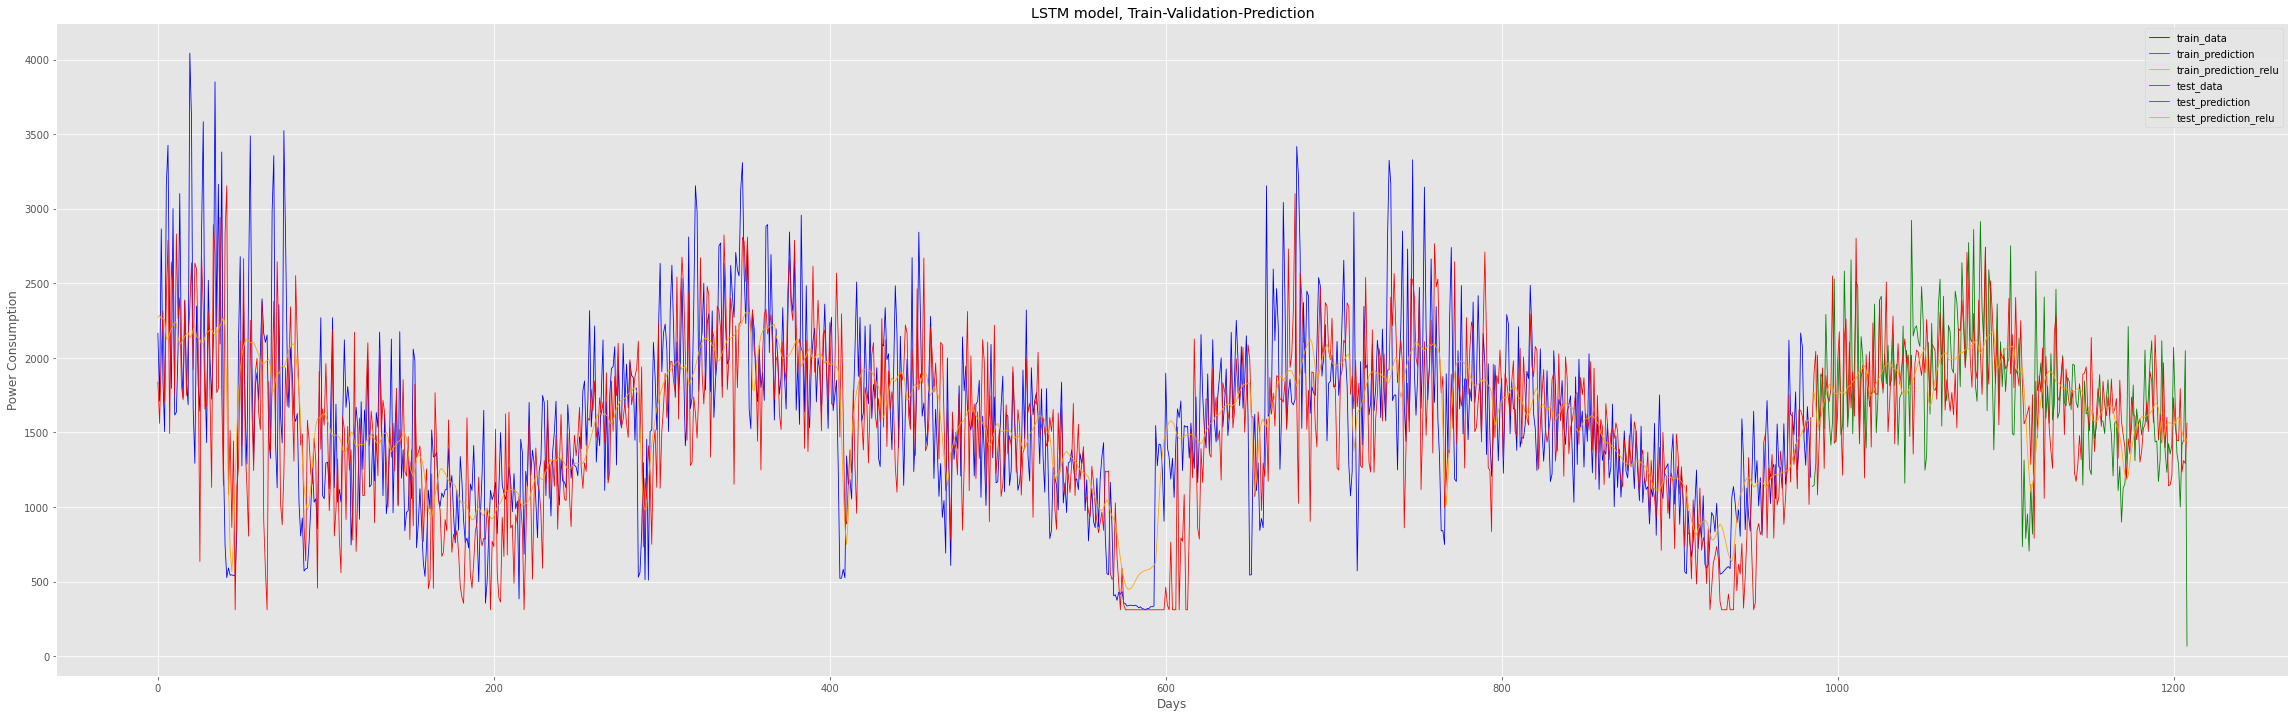

In [224]:
lw = 0.8
# Visualisation
plt.subplots(figsize =(40,12))
# X_train_inv against train days
plt.plot(range(len(X_train)), y_train_inv.reshape(-1,1), label = "train_data", color = "b", linewidth=lw)
# y_pred_train_inv against train days
plt.plot(range(len(X_train)), y_pred_train_inv.reshape(-1,1), label = "train_prediction", color = "r", linewidth=lw)
# y_pred_train_relu_inv against train days
plt.plot(range(len(X_train)), y_pred_train_relu_inv.reshape(-1,1), label = "train_prediction_relu", color = "orange", linewidth=lw)

# y_test_inv against test days
plt.plot(range(len(X_train), len(X_train)+len(X_test)), y_test_inv.reshape(-1,1), label = "test_data", color = "g", linewidth=lw)
# y_pred_test_inv against test days
plt.plot(range(len(X_train), len(X_train)+len(X_test)), y_pred_test_inv.reshape(-1,1), label = "test_prediction", color = "r", linewidth=lw)
# y_pred_test_relu_inv against test days
plt.plot(range(len(X_train), len(X_train)+len(X_test)), y_pred_test_relu_inv.reshape(-1,1), label = "test_prediction_relu", color = "orange", linewidth=lw)

# plt.plot(range(len(X_train)), y_train_inv, label = "validation_data", color = "g")
# plt.plot(range(len(X_train),len(X_train)+len(X_test)), X_train.index.iloc[30:], y_pred_train_inv, label = "y_pred", color = "r")
# plt.plot(X_test.index.iloc[30:], y_pred_test_inv, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Power Consumption")
plt.title("LSTM model, Train-Validation-Prediction")
plt.legend()
plt.show()